<a href="https://colab.research.google.com/github/etziosplay4u/Basics-of-AI-in-ML-DL/blob/main/Autoencoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Nesessary Libraries

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

# Declare a transform function to convert the images to tensors

In [ ]:
transform = transforms.Compose([
    transforms.ToTensor()
])

# Download the MNIST dataset and put them on a Dataloader

In [ ]:
data = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
loader = DataLoader(data, batch_size=64, shuffle=True)

100%|██████████| 9.91M/9.91M [00:00<00:00, 17.3MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 484kB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 3.85MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 5.09MB/s]


# Define Encoder and Decoder in AutoEncoder

In [ ]:
class AutoEncoder(nn.Module):
    def __init__(self):
        super(AutoEncoder, self).__init__()
        self.enc = nn.Sequential(
            nn.Flatten(),
            nn.Linear(784, 256),
            nn.ReLU(),
            nn.Linear(256, 64),
            nn.ReLU()
        )
        self.dec = nn.Sequential(
            nn.Linear(64, 256),
            nn.ReLU(),
            nn.Linear(256, 784),
            nn.Sigmoid(),
            nn.Unflatten(1, (1, 28, 28))
        )
    def forward(self, x):
        x = self.enc(x)
        x = self.dec(x)
        return x

# Define a loss function, optimizer and call the model

In [ ]:
model = AutoEncoder()
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

# Train the model

In [ ]:
epoch = 5
for epoch in range(epoch):
    for imgs, _ in loader:

        output = model(imgs)
        loss = criterion(output, imgs)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    print(f"Epoch [{epoch+1}/{epoch+1}], Loss: {loss.item():.4f}")

Epoch [1/1], Loss: 0.0139
Epoch [2/2], Loss: 0.0135
Epoch [3/3], Loss: 0.0171
Epoch [4/4], Loss: 0.0195
Epoch [5/5], Loss: 0.0166


# Evaluate the model (original vs reconstructed images)

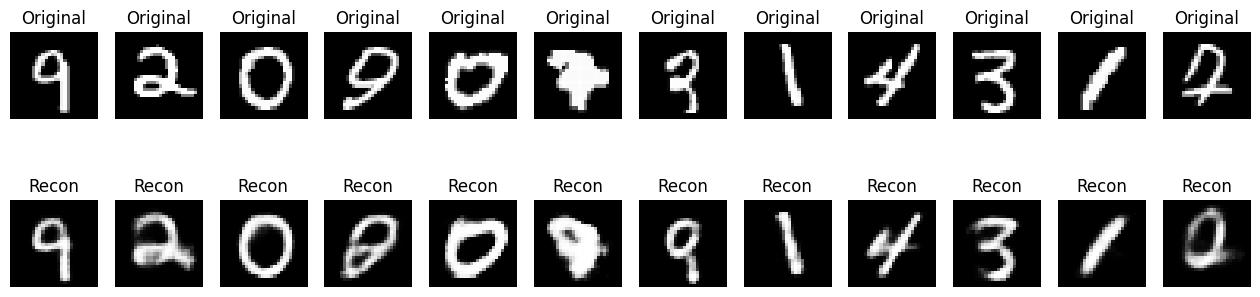

In [ ]:
model.eval()
imgs, _ = next(iter(loader))
with torch.no_grad():
    reconstructed = model(imgs) #disabled the gradient calc and puts the output in a recon var.
img_count = 12 #i want to show 12 images in og vs reco form
plt.figure(figsize=(16, 4))
for i in range(img_count):
    ax = plt.subplot(2, img_count, i + 1) #in ax var. created 2 grids put 1 img from the og in the 1st grid and iter+1
    plt.imshow(imgs[i].squeeze(), cmap="gray")
    plt.title("Original")
    plt.axis("off")

    ax = plt.subplot(2, img_count, i + 1 + img_count) #in the same ax var. within the same 2 grids put 1 img from the recon in the 2nd grid and iter+1+imgcount to avoid overlapping
    plt.imshow(reconstructed[i].squeeze(), cmap="gray")
    plt.title("Recon")
    plt.axis("off")

plt.show()